<a href="https://colab.research.google.com/github/badriadhikari/2019-Spring-DL/blob/master/course-content/Module2/DL_Dropout_IMDB_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original tutorial at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb

In [1]:
import keras
from keras import models
from keras import layers
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


## Prepare Dataset

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [4]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## The Original Training

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 287us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Ep

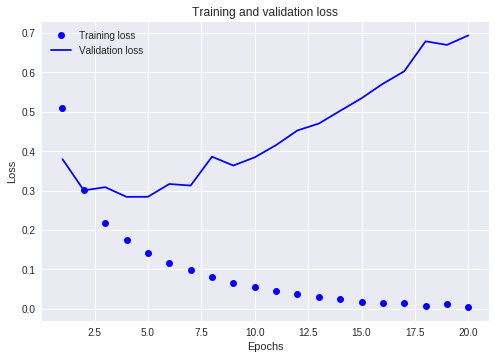

In [7]:
epochs = range(1, len(history.history['loss']) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 2s 97us/step
[0.7685788868188858, 0.84992]


## Dropout at dropout rate of 0.5

In [9]:
model_dropout_05 = models.Sequential()
# Dropout for the input layer will go here!!
model_dropout_05.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_dropout_05.add(layers.Dropout(rate = 0.5))
model_dropout_05.add(layers.Dense(16, activation='relu'))
model_dropout_05.add(layers.Dropout(rate = 0.5))
model_dropout_05.add(layers.Dense(1, activation='sigmoid'))
model_dropout_05.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_dropout_05 = model_dropout_05.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.6118 - acc: 0.6642 - val_loss: 0.4976 - val_acc: 0.8060
Epoch 2/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.4880 - acc: 0.7738 - val_loss: 0.3875 - val_acc: 0.8702
Epoch 3/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.4059 - acc: 0.8362 - val_loss: 0.3387 - val_acc: 0.8714
Epoch 4/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.3465 - acc: 0.8669 - val_loss: 0.2958 - val_acc: 0.8889
Epoch 5/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.3059 - acc: 0.8905 - val_loss: 0.2806 - val_acc: 0.8898
Epoch 6/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.2680 - acc: 0.9062 - val_loss: 0.2719 - val_acc: 0.8924
Epoch 7

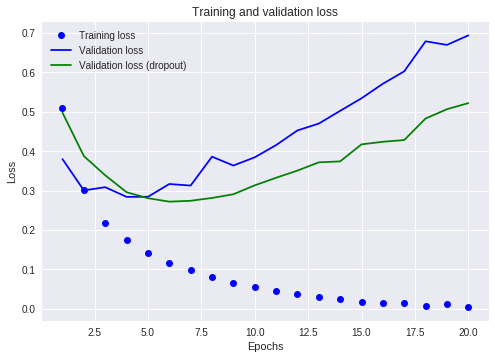

In [10]:
epochs = range(1, len(history.history['loss']) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
# b is for "solid blue line"
plt.plot(epochs, history_dropout_05.history['val_loss'], 'g', label='Validation loss (dropout)')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## How about a higher dropout rate?

In [11]:
model_dropout_08 = models.Sequential()
model_dropout_08.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_dropout_08.add(layers.Dropout(rate = 0.8))
model_dropout_08.add(layers.Dense(16, activation='relu'))
model_dropout_08.add(layers.Dropout(rate = 0.8))
model_dropout_08.add(layers.Dense(1, activation='sigmoid'))
model_dropout_08.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_dropout_08 = model_dropout_08.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.6883 - acc: 0.5433 - val_loss: 0.6699 - val_acc: 0.7096
Epoch 2/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.6697 - acc: 0.5905 - val_loss: 0.6495 - val_acc: 0.7577
Epoch 3/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.6487 - acc: 0.6303 - val_loss: 0.6189 - val_acc: 0.8185
Epoch 4/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.6290 - acc: 0.6612 - val_loss: 0.6025 - val_acc: 0.8409
Epoch 5/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.6103 - acc: 0.6857 - val_loss: 0.5610 - val_acc: 0.8476
Epoch 6/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.5979 - acc: 0.6973 - val_loss: 0.5291 - val_acc: 0.8326
Epoch 7/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.5884 - acc: 0.7091 - val_loss: 0.5227 - 

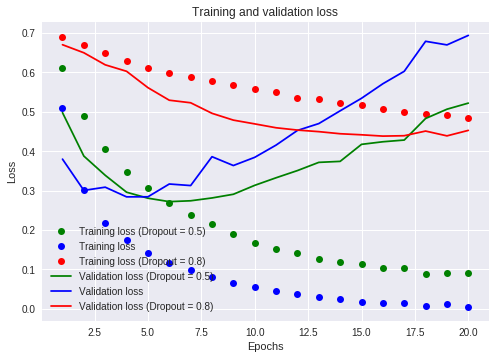

In [12]:
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history_dropout_05.history['loss'], 'go', label='Training loss (Dropout = 0.5)')
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dropout_08.history['loss'], 'ro', label='Training loss (Dropout = 0.8)')

plt.plot(epochs, history_dropout_05.history['val_loss'], 'g', label='Validation loss (Dropout = 0.5)')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.plot(epochs, history_dropout_08.history['val_loss'], 'r', label='Validation loss (Dropout = 0.8)')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()